In [0]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [2]:
import torchvision.datasets

MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

0it [00:00, ?it/s]

9920512it [00:02, 4638076.26it/s]                             


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

32768it [00:00, 67883.39it/s]                            
0it [00:00, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:01, 1136784.10it/s]                            
0it [00:00, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 26016.47it/s]            

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [18]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [0]:
X_train = X_train.float()
X_test = X_test.float()

# Shape of tensors

In [29]:
X_train.shape, X_test.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

In [30]:
y_train.shape, y_test.shape

(torch.Size([60000]), torch.Size([10000]))

# Show images from dataset

In [0]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2, :, :])
plt.show()
print(y_train[2])

# Inputs reshaping

In [0]:
X_train = X_train.reshape([-1, 28*28])
X_test = X_test.reshape([-1, 28*28])

# NN creating

In [0]:
class MNISTNet(torch.nn.Module):
  def __init__(self, n_hidden_neurons):
    super(MNISTNet, self).__init__()
    self.fc1 = torch.nn.Linear(28*28, n_hidden_neurons)
    self.ac1 = torch.nn.Sigmoid()
    self.fc2 = torch.nn.Linear(n_hidden_neurons, 10)
    
  def forward(self, x):
    x = self.fc1(x)
    x = self.ac1(x)
    x = self.fc2(x)
    return x

mnist_net = MNISTNet(100)

# Optimization of calculation

In [0]:
torch.cuda.is_available()

In [0]:
!nvidia-smi

In [0]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
mnist_net = mnist_net.to(device)
#list(mnist_net.parameters())

# NN training

In [0]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnist_net.parameters(), lr=1.0e-3)

In [46]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(10000):
  order = np.random.permutation(len(X_train)) #перемешивание элементов датасета
  
  for start_index in range(0, len(X_train), batch_size):
    optimizer.zero_grad()
    
    batch_indexes = order[start_index:start_index+batch_size]
    
    X_batch = X_train[batch_indexes].to(device)
    y_batch = y_train[batch_indexes].to(device)
    
    preds = mnist_net.forward(X_batch)
    
    loss_value = loss(preds, y_batch)
    loss_value.backward()
    
    optimizer.step()
    
  test_preds = mnist_net.forward(X_test)
  test_loss_history.append(loss(test_preds, y_test))
  
  accuracy = (test_preds.argmax(dim=1) == y_test).float().mean() #сравнение выходного максимального занчения с заданным классом
  test_accuracy_history.append(accuracy)
  
  print(accuracy)

tensor(0.9121, device='cuda:0')
tensor(0.9078, device='cuda:0')
tensor(0.9192, device='cuda:0')
tensor(0.9225, device='cuda:0')
tensor(0.9257, device='cuda:0')
tensor(0.9348, device='cuda:0')
tensor(0.9301, device='cuda:0')
tensor(0.9336, device='cuda:0')
tensor(0.9347, device='cuda:0')
tensor(0.9348, device='cuda:0')
tensor(0.9321, device='cuda:0')
tensor(0.9356, device='cuda:0')
tensor(0.9365, device='cuda:0')
tensor(0.9418, device='cuda:0')
tensor(0.9298, device='cuda:0')
tensor(0.9347, device='cuda:0')
tensor(0.9358, device='cuda:0')
tensor(0.9353, device='cuda:0')
tensor(0.9419, device='cuda:0')
tensor(0.9425, device='cuda:0')
tensor(0.9363, device='cuda:0')
tensor(0.9420, device='cuda:0')
tensor(0.9412, device='cuda:0')
tensor(0.9368, device='cuda:0')
tensor(0.9424, device='cuda:0')


KeyboardInterrupt: ignored

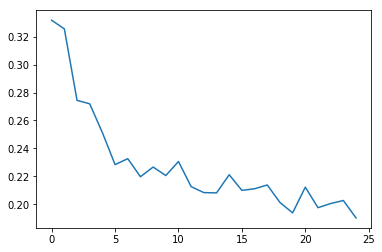

In [49]:
plt.plot(test_loss_history)